Implenting KNN and SVM to solve a simple problem [to make it possible to run in time], same procedure can very well scale to larger problems given enough time to run your codes.

Problem that we are discussing here pertains to predict which grade a student will belong to given their height and shoe size.

In [1]:
data_file=r'Grades.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
gd=pd.read_csv(data_file)


In [4]:
gd.head(10)

,shoe size,height,class
0,8.5,66.5,seniors
1,10.3,62.5,seniors
2,7.4,67.1,seniors
3,9.5,61.7,seniors
4,10.9,68.6,seniors
5,8.3,69.5,seniors
6,6.8,73.1,seniors
7,8.9,57.1,seniors
8,10.0,59.6,seniors
9,9.2,66.9,seniors


In [5]:
gd['class'].value_counts()

fourth     300
seniors    300
Name: class, dtype: int64

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold,train_test_split

C:\Users\patilsh\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
train,test=train_test_split(gd,test_size=0.2)

In [9]:
x_train=train[['shoe size','height']]
y_train=train['class']

x_test=test[['shoe size','height']]
y_test=test['class']



In [10]:
from ggplot import *

C:\Users\patilsh\AppData\Local\Continuum\Anaconda2\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\patilsh\AppData\Local\Continuum\Anaconda2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\patilsh\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
%matplotlib inline

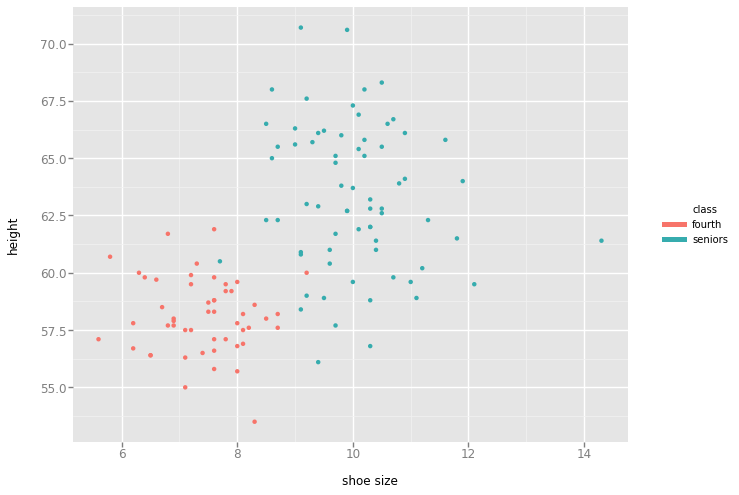

<ggplot: (17831309)>

In [12]:
ggplot(test,aes(x='shoe size',y='height',color='class'))+geom_point()

In [13]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [14]:
test['predicted']=knn.predict(x_test)

C:\Users\patilsh\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


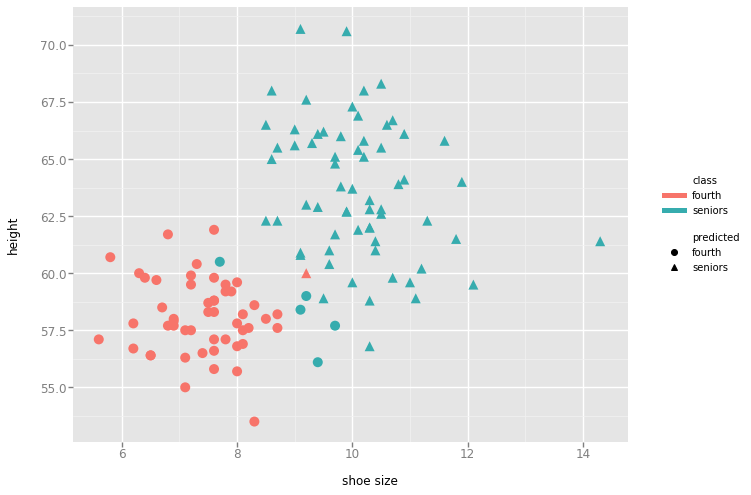

<ggplot: (17993283)>

In [15]:
ggplot(test,aes(x='shoe size',y='height',color='class',shape='predicted'))+geom_point(size=100)

In [16]:
pd.crosstab(test['class'],test['predicted'])

predicted,fourth,seniors
class,,
fourth,50,1
seniors,5,64


You can see that missclassification happens in boundry cases where neighbors are of mixed type

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,knn.predict(x_test))

0.94999999999999996

Now lets see how svm does on the same data

In [19]:
from sklearn import svm

In [20]:
help(svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

Parameters to tune here are :

**C** : this is penaly on errors

**kernel** : this variable transformation which is used for making cases linearly separable . 'rbf' is good enough and fits very fast. You can also try 'linear', 'poly', 'rbf', 'sigmoid' or your own methods. These kernels will have their own parameters to tune.

**degree** : this is degree for polynomial kernel , defaults to 3. doesnt matter if you are using rbf kernel

**gamma** : parameter for rbf, poly and sigmoid . default 1/n_features

**coef0** : independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.

**class_weight** : generally it is a good idea to keep it as 'balanced' as discussed for other algorithms.


In [21]:
clf=svm.SVC(verbose=True,cache_size=2000,C=20,
            class_weight='balanced')
clf.fit(x_train,y_train)

[LibSVM]

SVC(C=20, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [22]:
test['predicted_svm']=clf.predict(x_test)

C:\Users\patilsh\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
pd.crosstab(test['class'],test['predicted_svm'])

predicted_svm,fourth,seniors
class,,
fourth,50,1
seniors,6,63


In [24]:
accuracy_score(y_test,clf.predict(x_test))

0.94166666666666665

You can see that svm gives a huge boost in the accuracy , lets see visually where it has outsmarted KNN

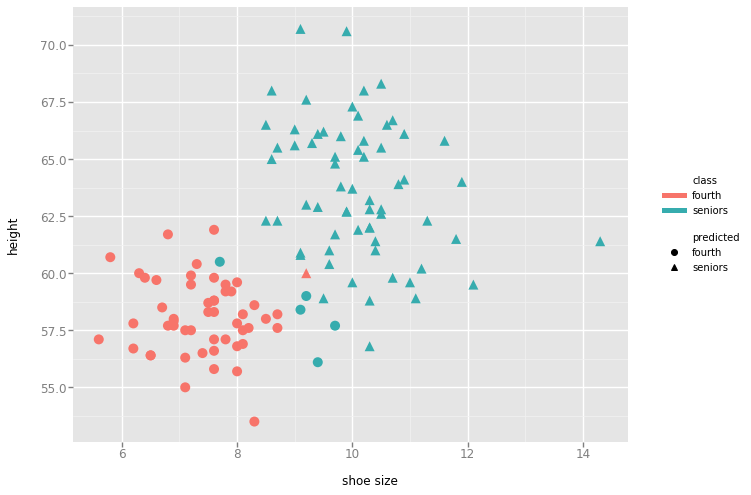

<ggplot: (14639171)>

In [25]:
ggplot(test,aes(x='shoe size',y='height',color='class',shape='predicted'))+geom_point(size=100)